### Yêu Cầu Bài Tập
Yêu cầu 1 — Đọc & Làm sạch dữ liệu 
1. Đọc đủ 3 sheet bằng pandas.
2. Chuẩn hóa tên tỉnh/thành, tên quận/huyện (ví dụ: in hoa/thường, loại bỏ khoảng trắng
thừa).
3. Kiểm tra giá trị null, trùng lặp trên toàn bộ dữ liệu.
4. Chuyển kiểu dữ liệu (Type Casting):
– Ngay → datetime
– GiaBan & SoLuong → int

In [1]:
import pandas as pd 
# 1. Đọc đủ 3 sheet bằng pandas.
df = pd.read_excel('data_CuaHangTienLoi_ShopKhai.xlsx', sheet_name=['CuaHang','HangHoa','GiaoDich'])

In [2]:
df_cua_hang = df['CuaHang']
df_hang_hoa = df['HangHoa']
df_giao_dich = df['GiaoDich']
# print(df_cua_hang)
print(df_cua_hang.info())
print(df_hang_hoa.info())
print(df_giao_dich.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MaCuaHang    20 non-null     object
 1   TenCuaHang   20 non-null     object
 2   TinhThanh    20 non-null     object
 3   QuanHuyen    20 non-null     object
 4   ViTri        20 non-null     object
 5   DienTich_m2  20 non-null     int64 
 6   SoNhanVien   20 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 1.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MaHang      126 non-null    object
 1   TenHang     126 non-null    object
 2   DanhMuc     126 non-null    object
 3   GiaBan      126 non-null    int64 
 4   NhaCungCap  126 non-null    object
dtypes: int64(1), object(4)
memory usage: 5.1+ KB
None
<class 'pandas.core.frame.DataFrame

In [3]:
# 2. Chuẩn hóa tên tỉnh/thành, tên quận/huyện (ví dụ: in hoa/thường, loại bỏ khoảng trắng
# thừa).
df_cua_hang[['TinhThanh', 'QuanHuyen']] = df_cua_hang[['TinhThanh', 'QuanHuyen']].astype('string').apply(
        lambda x: x.title().strip() if isinstance(x, str) and x.strip().upper() != 'HCM' else x
    )
df_cua_hang

,MaCuaHang,TenCuaHang,TinhThanh,QuanHuyen,ViTri,DienTich_m2,SoNhanVien
0,CH001,Shop K+ HCM CN1,HCM,Quận 3,Trung tâm thương mại,70,8
1,CH002,Shop K+ HCM CN2,HCM,Bình Thạnh,Văn phòng,111,8
2,CH003,Shop K+ HCM CN3,HCM,Phú Nhuận,Văn phòng,92,5
3,CH004,Shop K+ HCM CN4,HCM,Bình Thạnh,Trường học,65,12
4,CH005,Shop K+ HCM CN5,HCM,Quận 1,Trường học,86,11
5,CH006,Shop K+ Hà Nội CN6,Hà Nội,Cầu Giấy,Trung tâm thương mại,167,10
6,CH007,Shop K+ Hà Nội CN7,Hà Nội,Hà Đông,Trường học,123,7
7,CH008,Shop K+ Hà Nội CN8,Hà Nội,Hoàn Kiếm,Khu công nghiệp,124,7
8,CH009,Shop K+ Hà Nội CN9,Hà Nội,Cầu Giấy,Khu dân cư,128,10
9,CH010,Shop K+ Hà Nội CN10,Hà Nội,Hoàn Kiếm,Trường học,144,4


In [4]:
# 3. Kiểm tra giá trị null, trùng lặp trên toàn bộ dữ liệu.
df_cua_hang.isna().sum() # df_cua_hang.isna().any() 
df_hang_hoa.isna().sum()
df_giao_dich.isna().sum()
df_cua_hang.duplicated().sum()
df_hang_hoa.duplicated().sum()
df_giao_dich.duplicated().sum()

np.int64(0)

In [5]:
# 4. Chuyển kiểu dữ liệu (Type Casting):
# – Ngay → datetime
# – GiaBan & SoLuong → int

df_giao_dich['Ngay'] = pd.to_datetime(df_giao_dich['Ngay'],errors='coerce')
df_giao_dich
df_giao_dich.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MaGD       10000 non-null  object        
 1   MaCuaHang  10000 non-null  object        
 2   MaHang     10000 non-null  object        
 3   SoLuong    10000 non-null  int64         
 4   Ngay       10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 390.8+ KB


### Yêu cầu 2 — Gộp dữ liệu (15 điểm)
Gộp dữ liệu theo 3 bảng để tạo ra bảng phân tích tổng hợp df_all:
– GiaoDich → gộp với HangHoa theo MaHang
– → gộp tiếp với CuaHang theo MaCuaHang

MaCuaHang	TenCuaHang	TinhThanh	QuanHuyen	ViTri	DienTich_m2	SoNhanVien

MaHang	TenHang	DanhMuc	GiaBan	NhaCungCap

MaGD	MaCuaHang	MaHang	SoLuong	Ngay

In [ ]:
df_all = pd.DataFrame()

df_all = df_giao_dich.merge(df_hang_hoa, on ='MaHang', how='left')

df_all = df_all.merge(df_cua_hang, on='MaCuaHang', how='left')

df_all.head()

### Yêu cầu 3 — Tính toán & Phân tích thống kê (65 điểm)
1. Tạo thêm các cột:
– DoanhThu = SoLuong × GiaBan
– Thang = tháng của cột Ngay
2. Phân tích tổng quan:
– Tổng doanh thu toàn hệ thống
– Doanh thu theo từng cửa hàng
– Doanh thu theo từng tỉnh/thành
– Doanh thu theo danh mục sản phẩm
3. Sản phẩm & Cửa hàng:
– Top 10 sản phẩm bán chạy nhất (theo SoLuong)
– Top 10 sản phẩm có doanh thu cao nhất
– Top 5 cửa hàng doanh thu cao nhất
– Top 5 cửa hàng có lượng bán thấp nhất (theo SoLuong)
4. Phân tích theo vị trí cửa hàng:
– So sánh doanh thu TB của các loại vị trí: Khu dân cư, Văn phòng, Trường học, Khu
công nghiệp, Trung tâm thương mại.
– Xác định loại vị trí có: Doanh thu trung bình cao nhất, Số giao dịch nhiều nhất

In [ ]:
# DoanhThu = SoLuong × GiaBan

df_all['DoanhThu'] = df_all[['SoLuong', 'GiaBan']].apply(
    lambda x: x['SoLuong']*x['GiaBan'], axis =1
)
# Thang = tháng của cột Ngay

df_all['Thang'] = pd.to_datetime(df_all['Ngay']).dt.month 
df_all.head()

In [ ]:
# 2. Phân tích tổng quan:
# Tổng doanh thu toàn hệ thống
doanh_thu = df_all['DoanhThu'].sum()

# – Doanh thu theo từng cửa hàng
dt_cua_hang = df_all.groupby('MaCuaHang').sum('DoanhThu').sort_values('DoanhThu', ascending=False)

# – Doanh thu theo từng tỉnh/thành
dt_tinh = df_all.groupby('TinhThanh').sum('DoanhThu').sort_values('DoanhThu', ascending=False)

# Doanh thu theo danh mục sản phẩm
dt_san_pham = df_all.groupby('DanhMuc').sum('DoanhThu').sort_values('DoanhThu', ascending = False)
dt_san_pham.head()


In [ ]:
# 3. Sản phẩm & Cửa hàng:

# – Top 10 sản phẩm bán chạy nhất (theo SoLuong)
top_10_theo_so_luong = df_all.groupby('SoLuong')['DoanhThu'].sum().nlargest(10)

# Top 10 sản phẩm có doanh thu cao nhất
top_10_dt = df_all.groupby('TenHang')['DoanhThu'].sum().nlargest(10)

# Top 5 cửa hàng doanh thu cao nhất
top_5_dt = df_all.groupby('MaCuaHang')['DoanhThu'].sum().nlargest(5)

# Top 5 cửa hàng có lượng bán thấp nhất (theo SoLuong)
cua_hang_dt_thap = df_all.groupby('MaCuaHang')['DoanhThu'].sum().nsmallest(5)
cua_hang_dt_thap


### Phân tích theo vị trí cửa hàng:
– So sánh doanh thu TB của các loại vị trí: Khu dân cư, Văn phòng, Trường học, Khu
công nghiệp, Trung tâm thương mại.
– Xác định loại vị trí có: Doanh thu trung bình cao nhất, Số giao dịch nhiều nhất.

In [35]:
# – So sánh doanh thu TB của các loại vị trí: Khu dân cư, Văn phòng, Trường học, Khu
# công nghiệp, Trung tâm thương mại.

dt_vi_tri = df_all.groupby('ViTri').mean('DoanhThu').sort_values('DoanhThu', ascending=False)

# Xác định loại vị trí có: Doanh thu trung bình cao nhất
top_dt_vi_tri = df_all.groupby('ViTri')['DoanhThu'].mean().nlargest(1)
top_dt_vi_tri
# Số giao dịch nhiều nhất
top_dt_vi_tri_giao_dich = df_all.groupby('ViTri')['SoLuong'].sum().nlargest(1)
top_dt_vi_tri_giao_dich



ViTri
Trung tâm thương mại    93871
Name: SoLuong, dtype: int64

### Yêu cầu 4 — Phân tích nâng cao & Trực quan hóa (Phần không bắt buộc)
1. Phân tích xu hướng doanh thu từng tháng (Monthly Trend Analysis) của toàn hệ thống.
2. Xác định Top 5 sản phẩm bán chạy theo từng thành phố.
3. Xác định Top 3 nhà cung cấp mang lại doanh thu lớn nhất.
4. Tìm sản phẩm bán rất chậm (Low-selling): Liệt kê Top 5 sản phẩm có tổng số lượng bán
ra thấp nhất.
5. Vẽ biểu đồ trực quan hóa các kết quả sau:
– Doanh thu theo tháng (Line chart).
– Top 10 mặt hàng có doanh thu cao nhất (Bar chart).
– So sánh doanh thu TB của các loại vị trí cửa hàng (Bar chart).

In [39]:
# Phân tích xu hướng doanh thu từng tháng (Monthly Trend Analysis) của toàn hệ thống.

dt_thang = df_all.groupby('Thang').sum('DoanhThu')
print(dt_thang)

# Xác định Top 5 sản phẩm bán chạy theo từng thành phố.
top_5_tinh_thanh = df_all.groupby('TinhThanh')['DoanhThu'].sum().nlargest(5)

# Xác định Top 3 nhà cung cấp mang lại doanh thu lớn nhất.
top_3_cung_ung = df_all.groupby('NhaCungCap')['DoanhThu'].sum().nlargest(3)

# Tìm sản phẩm bán rất chậm (Low-selling): Liệt kê Top 5 sản phẩm có tổng số lượng bán
# ra thấp nhất.

lowest_5_product = df_all.groupby('TenHang')['DoanhThu'].sum().nsmallest(5)
lowest_5_product

       SoLuong  GiaBan  DienTich_m2  SoNhanVien  DoanhThu
Thang                                                    
1        81652   93921       294934       22589   2871221
2        70840   81429       253966       19658   2501932
3        76357   91005       276005       21406   2734933
4        76629   90533       275469       21284   2779646


TenHang
Snack Khoai Tây BBQ - Lon       18584
Twister Cam - Túi               21464
Snack Gà Cay - Lon              22640
Sting Dâu - Chai                23184
Hạt điều rang muối - Gói lớn    24420
Name: DoanhThu, dtype: int64

### 5. Vẽ biểu đồ trực quan hóa các kết quả sau:
– Doanh thu theo tháng (Line chart).
– Top 10 mặt hàng có doanh thu cao nhất (Bar chart).
– So sánh doanh thu TB của các loại vị trí cửa hàng (Bar chart). -->

In [50]:
import matplotlib
import matplotlib.pyplot as plt 

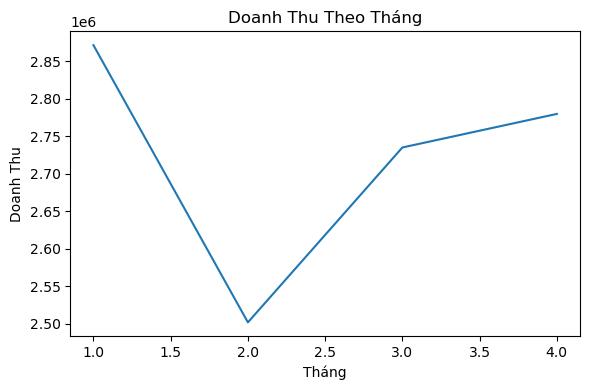

In [ ]:
# Doanh thu theo tháng (Line chart).
y = df_all.groupby('Thang')['DoanhThu'].sum()

fig, ax = plt.subplots(figsize = (6,4))
ax.plot(y.index, y.values)
ax.set_title('Doanh Thu Theo Tháng')
ax.set_xlabel('Tháng')
ax.set_ylabel('Doanh Thu')
plt.tight_layout()
plt.show()

In [ ]:
# – Top 10 mặt hàng có doanh thu cao nhất (Bar chart).

y = df_all.groupby('TenHang')['DoanhThu'].sum().nlargest(10)

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(y.index, y.values, color='g')
ax.set_title(' Top 10 mặt hàng có doanh thu cao nhất')
ax.set_xlabel('Tên Hàng')
ax.set_ylabel('Doanh Thu')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

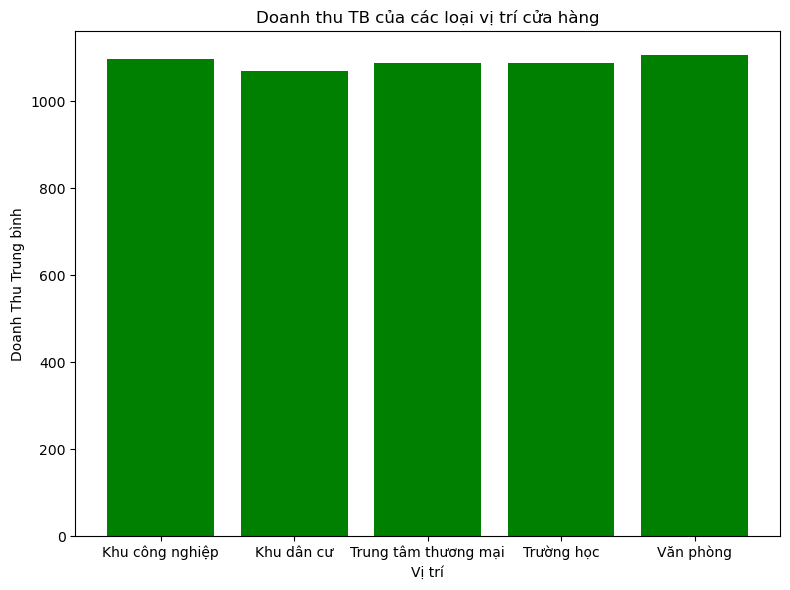

In [69]:
# So sánh doanh thu TB của các loại vị trí cửa hàng (Bar chart).

y = df_all.groupby('ViTri')['DoanhThu'].mean()

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(y.index, y.values, color='g')
ax.set_title('Doanh thu TB của các loại vị trí cửa hàng')
ax.set_xlabel('Vị trí')
ax.set_ylabel('Doanh Thu Trung bình')

plt.tight_layout()
plt.show()
